In [1]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import diff
import seaborn as sns
from functions import readOutput
import pandas as pd

In [5]:
df = pd.read_csv('world_stats.csv');
df.population = df.population/1000;

df2 = pd.read_csv('anomaly.csv');
df2.columns = ['year','anomaly','smoothed']; #rename column headers

#df.set_index('time',inplace=True);
#df2.set_index('year',inplace=True);

#plot data directly from NASA GISS: https://data.giss.nasa.gov/gistemp/graphs_v4/
#plt.scatter(df2['year'],df2['anomaly'])
#plt.plot(df2['year'],df2['smoothed'])

#convert from anomaly series to temperature series with BASELINE = 14.5 C
df2['tempC']=df2['anomaly']+14.5;
df2['tempC_smooth']=df2['smoothed']+14.5;
#then convert from Celsius to Kelvin by adding 273.15
df2['tempK']=df2['tempC']+273.15;
df2['tempK_smooth']=df2['tempC_smooth']+273.15;

#plot anomaly data converted into kelvin
#plt.scatter(df2['year'],df2['tempK'], c="black",alpha=.5)
#plt.plot(df2['year'],df2['tempK_smooth'],c='r')

#line=plt.scatter(co2,np.log(population),c=time,cmap='jet');
#plt.colorbar(line);

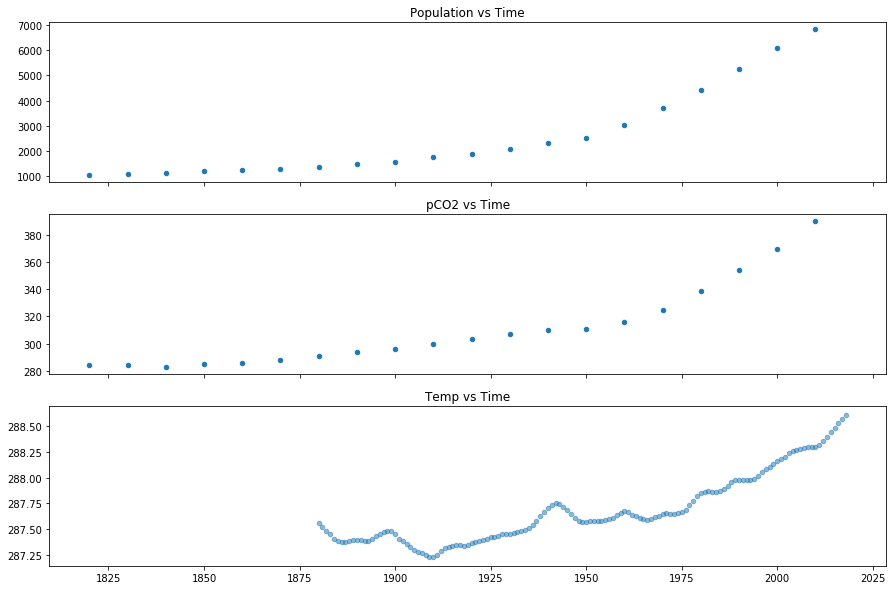

In [3]:
co2 = np.asarray(df.co2_ppm)
population = np.asarray(df.population)
temp_smooth = df2['tempK_smooth']
timeP = np.asarray(df.time)
timeT = np.asarray(df2.year)
tempK = np.asarray(df2.tempK)
tempK_smooth = np.asarray(df2.tempK_smooth)

size = 20

fig, (ax1, ax2, ax3) = plt.subplots(3,sharex=True,figsize=(15,10));
ax1.scatter(timeP,population,s=size, label='True Population');
ax1.set_title("Population vs Time")

ax2.scatter(timeP,co2,s=size, label='True pC02');
ax2.set_title("pCO2 vs Time");

ax3.scatter(timeT,tempK_smooth,label='True Temp', alpha=.5,s=size);
ax3.set_title("Temp vs Time");


In [10]:
modelData, finalavgtemp = readOutput();

modelTime = np.asarray(modelData['time'])
modelTemp = np.asarray(modelData['temp'])
modelPop = np.asarray(modelData['pop'])
modelPco2 = np.asarray(modelData['pco2'])
modelData.head()

,time,temp,pco2,pop
0,31622000.0,287.44,0.000284,1052.1
1,63245000.0,286.26,0.000285,1058.6
2,94867000.0,285.94,0.000285,1063.9
3,126490000.0,286.02,0.000285,1069.6
4,158110000.0,286.19,0.000286,1075.9
